In [1]:
import numpy as np
import h5py
import pandas as pd
import matplotlib.pyplot as plt

KeysView(NpzFile '/home/tliopis/Codes/exoplanets_llopis_mary_2025/data/npz_datasets/soapgpu_ns120_5000-5010_dx4_sm3_rassine_noise_p100_k0p1_phi0.npz' with keys: wavegrid, template, spectra, activity, time_values...)


/home/tliopis/Codes/exoplanets_llopis_mary_2025/venv/lib/python3.9/site-packages/numba/core/decorators.py:246: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)


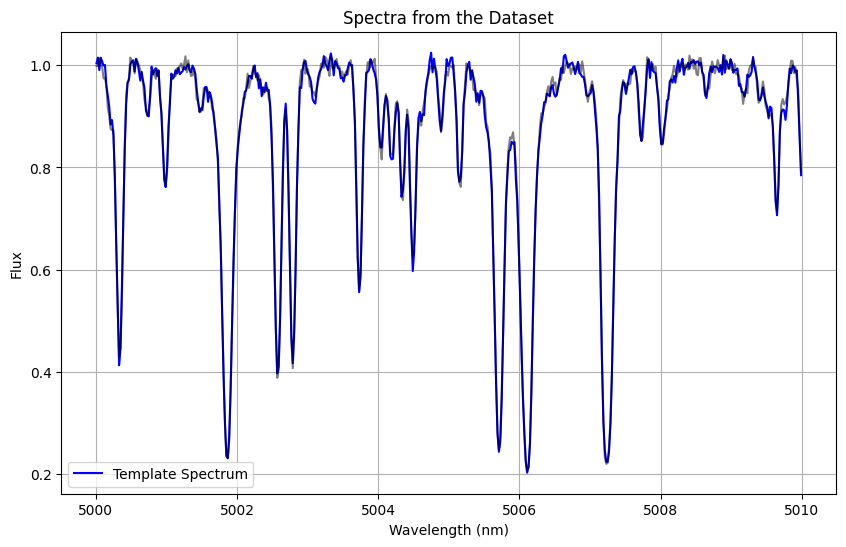

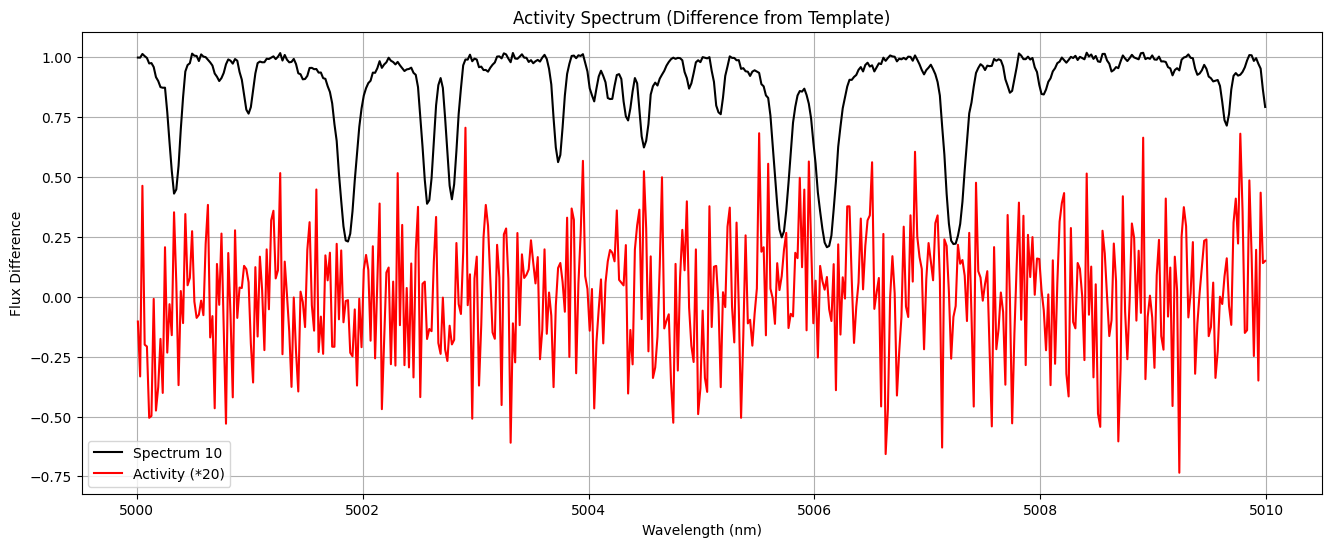

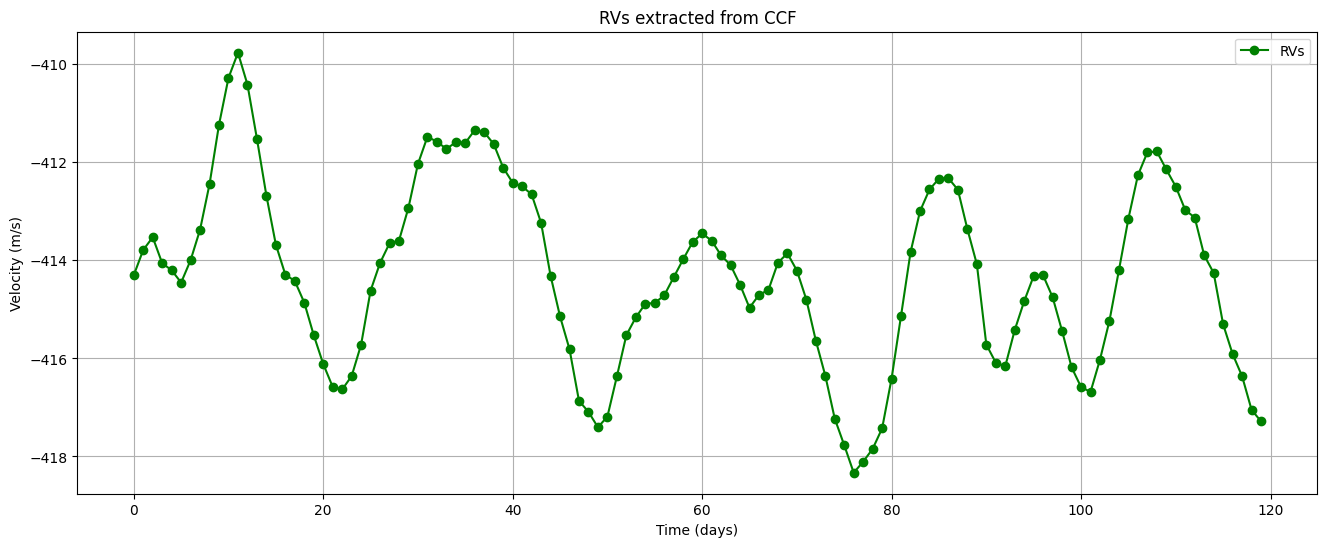

In [ ]:
from src.ccf import get_full_ccf_analysis

dset = np.load(
    "/home/tliopis/Codes/exoplanets_llopis_mary_2025/data/npz_datasets/soapgpu_ns120_5000-5010_dx4_sm3_rassine_noise_p100_k0p1_phi0.npz"
)

print(dset.keys())
wavegrid = dset["wavegrid"]
spectra = dset["spectra"]
template = dset["template"]
activity = dset["activity"]

ccf_analysis = np.load("../data/ccf_results/ccf_analysis_results.npz")
rvs = ccf_analysis["rvs"]

plt.figure(figsize=(10, 6))
plt.plot(wavegrid, template, label="Template Spectrum", color="blue")
plt.plot(wavegrid, spectra[10], label="Spectra n°10", color="black", alpha=0.5)
plt.title("Spectra from the Dataset")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Flux")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(16, 6))
plt.plot(wavegrid, spectra[10], label="Spectrum 10", color="black")
plt.plot(wavegrid, (activity[10])*20, label="Activity (*20)", color="red")
plt.title("Activity Spectrum (Difference from Template)")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Flux Difference")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(16, 6))
plt.plot(dset["time_values"], rvs[dset["time_values"]], label="RVs", color="green", marker='o')
plt.title("RVs extracted from CCF")
plt.xlabel("Time (days)")
plt.ylabel("Velocity (m/s)")
plt.legend()
plt.grid()
plt.show()